# Data Preparation

In [6]:
import pandas as pd
import numpy as np

In [7]:
PlayerInf = pd.read_csv("../data/player_info.csv")
#Games_plays = pd.read_csv("../data/game_plays.csv")

#Game_goalie_stats = pd.read_csv("../data/game_plays_players.csv")
Game_skater_stats = pd.read_csv("../data/game_skater_stats.csv")
Game = pd.read_csv("../data/game.csv")

### Players Statistics (detailed)

In [108]:
Player_stat_detailed = pd.merge(Game_skater_stats, Game, on='game_id')

In [101]:
Player_stat_detailed

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2012030221,8471958,3,1925,0,0,0,3,0,0,...,6,2,3,home win OT,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT
1,2012030221,8471339,3,1597,1,0,2,3,0,0,...,6,2,3,home win OT,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT
2,2012030221,8471873,3,1695,0,0,1,2,0,0,...,6,2,3,home win OT,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT
3,2012030221,8473432,3,957,0,0,3,5,0,0,...,6,2,3,home win OT,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT
4,2012030221,8470192,3,859,0,0,1,0,0,0,...,6,2,3,home win OT,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT
5,2012030221,8474151,3,1919,0,1,3,5,0,0,...,6,2,3,home win OT,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT
6,2012030221,8475184,3,697,0,0,0,3,0,0,...,6,2,3,home win OT,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT
7,2012030221,8475186,3,933,0,0,1,0,0,0,...,6,2,3,home win OT,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT
8,2012030221,8474176,3,1183,1,0,4,3,0,0,...,6,2,3,home win OT,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT
9,2012030221,8467389,3,777,0,0,1,1,0,0,...,6,2,3,home win OT,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT


In [109]:
Player_stat_detailed = Player_stat_detailed.drop(['game_id', 'team_id', 'type', 'date_time', 'away_team_id', 'home_team_id', 'away_goals',
       'home_goals', 'outcome', 'home_rink_side_start', 'venue', 'venue_link',
       'venue_time_zone_id', 'venue_time_zone_offset', 'venue_time_zone_tz' ], axis=1)

In [110]:
Player_stat_detailed['points_scored'] = Player_stat_detailed['goals']+Player_stat_detailed['assists']

In [111]:
Player_stat_detailed = Player_stat_detailed[Player_stat_detailed['player_id'].isin(arr)]

In [112]:
Player_stat_detailed.to_csv("data/PlayerStats.csv")

In [116]:
Player_stat_detailed[Player_stat_detailed['player_id']== 8471214]['faceOffWins'].dropna()

1648      0
1684      0
1702      0
1738      0
1784      0
1802      0
1856      0
3012      0
3048      0
3066      0
3101      0
3155      0
3174      0
5208      0
5244      0
5261      0
5298      0
5351      0
5370      0
6305      1
6341      0
6395      0
6431      0
6449      0
6503      0
6522      0
6789      0
6825      0
6843      0
6879      0
         ..
249877    0
250419    0
250832    0
250979    0
251627    0
252508    0
252977    0
253476    0
253677    0
256195    0
256339    0
256501    0
256663    0
258715    0
259182    0
259220    0
259562    0
260065    0
260281    0
261688    0
261884    0
262012    0
262066    0
262369    0
264509    0
265323    0
265396    0
265537    0
265682    0
267317    0
Name: faceOffWins, Length: 520, dtype: int64

In [66]:
Player_stat_detailed.columns

Index(['player_id', 'timeOnIce', 'assists', 'goals', 'shots', 'hits',
       'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes', 'faceOffWins',
       'faceoffTaken', 'takeaways', 'giveaways', 'shortHandedGoals',
       'shortHandedAssists', 'blocked', 'plusMinus', 'evenTimeOnIce',
       'shortHandedTimeOnIce', 'powerPlayTimeOnIce', 'season', 'count'],
      dtype='object')

In [67]:
grouped = Player_stat_detailed.groupby('player_id', as_index = False)

In [69]:
Player_stat_detailed = grouped.agg({'timeOnIce' : 'mean',
                                     'assists' : 'mean',
                                     'goals' : 'mean',
                                     'shots' : 'mean',
                                     'hits' : 'mean',
                                     'powerPlayGoals' : 'mean',
                                     'powerPlayAssists' : 'mean',
                                     'penaltyMinutes' : 'mean',
                                     'faceOffWins' : 'mean',
                                     'faceoffTaken' : 'mean',
                                     'takeaways' : 'mean',
                                     'giveaways' : 'mean',
                                     'shortHandedGoals' : 'mean',
                                     'shortHandedAssists' : 'mean',
                                     'blocked' : 'mean',
                                     'plusMinus' : 'sum',
                                     'evenTimeOnIce' : 'mean',
                                     'shortHandedTimeOnIce' : 'mean',
                                     'powerPlayTimeOnIce' : 'mean',
                                     'count' : 'sum'}, group_keys = True)

In [70]:
Player_stat_detailed = pd.merge(Player_stat_detailed, PlayerInf, on='player_id')
Player_stat_detailed.columns

Index(['player_id', 'timeOnIce', 'assists', 'goals', 'shots', 'hits',
       'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes', 'faceOffWins',
       'faceoffTaken', 'takeaways', 'giveaways', 'shortHandedGoals',
       'shortHandedAssists', 'blocked', 'plusMinus', 'evenTimeOnIce',
       'shortHandedTimeOnIce', 'powerPlayTimeOnIce', 'count', 'firstName',
       'lastName', 'nationality', 'birthCity', 'primaryPosition', 'birthDate',
       'link'],
      dtype='object')

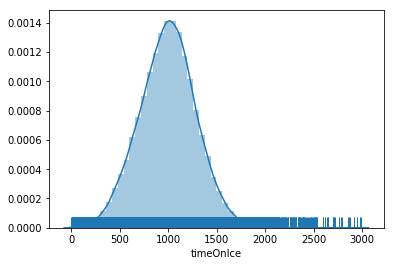

In [79]:
import seaborn as sns
%matplotlib inline

sns.distplot(Player_stat_detailed['timeOnIce'], rug=True)

In [80]:
Player_stat_detailed['timeOnIce'].describe()

count    267854.000000
mean        993.828392
std         293.213382
min           1.000000
25%         800.000000
50%         999.000000
75%        1187.000000
max        2991.000000
Name: timeOnIce, dtype: float64

## Players Goals

In [18]:
Games_plays = pd.read_csv("../data/game_plays.csv")
Game_plays_players = pd.read_csv("../data/game_plays_players.csv")


Goals = pd.merge(Games_plays[(Games_plays['event'] == "Goal")],Game_plays_players[Game_plays_players['playerType'] == "Scorer"][['play_id','player_id']],on = 'play_id')

In [19]:
total_goals = pd.DataFrame(Goals.groupby(['player_id']).size())

In [20]:
Goals = pd.merge(Goals, PlayerInf[['player_id', 'firstName', 'lastName', 'primaryPosition', 'birthDate']], on = 'player_id')

In [21]:
Goals = pd.merge(Goals, Game[['season', 'game_id']], on = 'game_id')

In [22]:
total_goals =  pd.merge(total_goals, PlayerInf[['player_id', 'firstName', 'lastName', 'primaryPosition', 'birthDate']], on = 'player_id')
total_goals.sort_values(by=[0], ascending=False)

,player_id,0,firstName,lastName,primaryPosition,birthDate
292,8471214,301,Alex,Ovechkin,LW,1985-09-17
354,8471675,232,Sidney,Crosby,C,1987-08-07
525,8474141,231,Patrick,Kane,RW,1988-11-19
277,8470794,222,Joe,Pavelski,C,1984-07-11
769,8475765,211,Vladimir,Tarasenko,RW,1991-12-13
649,8475166,204,John,Tavares,C,1990-09-20
785,8475794,198,Tyler,Seguin,C,1992-01-31
480,8473994,194,Jamie,Benn,LW,1989-07-18
293,8471215,194,Evgeni,Malkin,C,1986-07-31
250,8470621,193,Corey,Perry,RW,1985-05-16


In [23]:
top_goaliers = total_goals.sort_values(by=[0], ascending=False)[:30]

In [24]:
Goals['distance'] = np.sqrt(np.power(Goals['st_x'] - 100+11,2)+np.power(Goals['st_y'],2))

In [25]:
Goals['periodType'].unique()

array(['REGULAR', 'OVERTIME', 'SHOOTOUT'], dtype=object)

In [26]:
def assist(s):
    s= s[s.find(':')+2:]
    s = s.split()
    if s[0] =='none':
        return("None")
    else:
        return(s[0]+' '+s[1])

def distance_bin(a):
    return("("+str((a//5)*5)+"ft, "+ str((a//5 + 1)*5) +"ft)")


In [27]:
Goals['assist'] = Goals['description'].apply(assist)


In [28]:
Goals['distance_bin'] = Goals['distance'].apply(distance_bin)
Goals['fullName'] = Goals['firstName']+ ' ' +Goals['lastName']

In [29]:
Goals['secondaryType'].unique()

array(['Slap Shot', 'Snap Shot', 'Tip-In', 'Wrist Shot', 'Backhand',
       'Deflected', 'Wrap-around', nan], dtype=object)

In [30]:
for i in range(30):
    player_id  = int(top_goaliers.iloc[[i]]['player_id'])
    Goals[(Goals['player_id'] == player_id) & (Goals['st_x']>0)].to_csv("data/Players/" + str(player_id) + ".csv")
    pd.value_counts(Goals[(Goals['player_id'] == player_id) & (Goals['st_x']>0)]['distance_bin']).to_frame().reset_index().to_csv("data/Bars/" + str(player_id) + ".csv")
    print("<option value="+str(player_id)+">"+str(top_goaliers.iloc[i, 2])+' '+str(top_goaliers.iloc[i, 3])+"</option>")
    

<option value=8471214>Alex Ovechkin</option>
<option value=8471675>Sidney Crosby</option>
<option value=8474141>Patrick Kane</option>
<option value=8470794>Joe Pavelski</option>
<option value=8475765>Vladimir Tarasenko</option>
<option value=8475166>John Tavares</option>
<option value=8475794>Tyler Seguin</option>
<option value=8473994>Jamie Benn</option>
<option value=8471215>Evgeni Malkin</option>
<option value=8470621>Corey Perry</option>
<option value=8473419>Brad Marchand</option>
<option value=8473604>Jonathan Toews</option>
<option value=8474564>Steven Stamkos</option>
<option value=8473548>Phil Kessel</option>
<option value=8474053>Logan Couture</option>
<option value=8474157>Max Pacioretty</option>
<option value=8476453>Nikita Kucherov</option>
<option value=8471707>James Neal</option>
<option value=8470604>Jeff Carter</option>
<option value=8466139>Patrick Marleau</option>
<option value=8470638>Patrice Bergeron</option>
<option value=8470041>Rick Nash</option>
<option value=8

In [31]:
pd.value_counts(Goals['distance_bin']).to_frame().reset_index()

,index,distance_bin
0,"(10.0ft, 15.0ft)",8190
1,"(5.0ft, 10.0ft)",7176
2,"(15.0ft, 20.0ft)",4843
3,"(20.0ft, 25.0ft)",3666
4,"(25.0ft, 30.0ft)",3106
5,"(30.0ft, 35.0ft)",2435
6,"(35.0ft, 40.0ft)",1922
7,"(40.0ft, 45.0ft)",1414
8,"(45.0ft, 50.0ft)",1026
9,"(165.0ft, 170.0ft)",985


In [32]:
top_goaliers['fullName'] = top_goaliers['firstName']+ ' ' +top_goaliers['lastName']
top_goaliers[['player_id', 'fullName']].to_csv('data/Players/players.csv')

In [33]:
for i in range(30):
    print(str(top_goaliers.iloc[i, 0])+" : "+ "\'" + str(top_goaliers.iloc[i, 6])+"\',")

8471214 : 'Alex Ovechkin',
8471675 : 'Sidney Crosby',
8474141 : 'Patrick Kane',
8470794 : 'Joe Pavelski',
8475765 : 'Vladimir Tarasenko',
8475166 : 'John Tavares',
8475794 : 'Tyler Seguin',
8473994 : 'Jamie Benn',
8471215 : 'Evgeni Malkin',
8470621 : 'Corey Perry',
8473419 : 'Brad Marchand',
8473604 : 'Jonathan Toews',
8474564 : 'Steven Stamkos',
8473548 : 'Phil Kessel',
8474053 : 'Logan Couture',
8474157 : 'Max Pacioretty',
8476453 : 'Nikita Kucherov',
8471707 : 'James Neal',
8470604 : 'Jeff Carter',
8466139 : 'Patrick Marleau',
8470638 : 'Patrice Bergeron',
8470041 : 'Rick Nash',
8471698 : 'T.J. Oshie',
8474190 : 'Wayne Simmonds',
8470610 : 'Zach Parise',
8474037 : 'James van Riemsdyk',
8471218 : 'Blake Wheeler',
8471685 : 'Anze Kopitar',
8475168 : 'Matt Duchene',
8475784 : 'Jeff Skinner',


### Костыли

In [34]:
arr = []
for i in range(30):
    arr.append(top_goaliers.iloc[i, 0])
arr

[8471214,
 8471675,
 8474141,
 8470794,
 8475765,
 8475166,
 8475794,
 8473994,
 8471215,
 8470621,
 8473419,
 8473604,
 8474564,
 8473548,
 8474053,
 8474157,
 8476453,
 8471707,
 8470604,
 8466139,
 8470638,
 8470041,
 8471698,
 8474190,
 8470610,
 8474037,
 8471218,
 8471685,
 8475168,
 8475784]

In [35]:
def GoalLocations(name, lastname):
    x,y = np.array(Goals[(Goals['lastName'] == lastname) & (Goals['firstName'] == name)]['st_x']),\
        np.array(Goals[(Goals['lastName'] == lastname) & (Goals['firstName'] == name)]['st_x'])
    return x,y

In [36]:
Goals[Goals['player_id'].isin(arr)].to_excel("data/General/Goals.xls")

In [37]:
Goals[(Goals['lastName'] == 'Ovechkin') & (Goals['firstName'] == 'Alex')].to_csv('goals.csv')

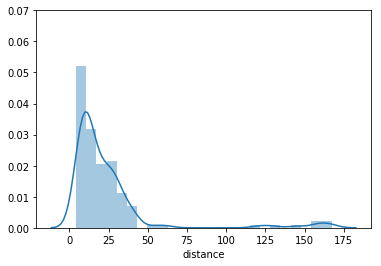

In [43]:
import matplotlib.pyplot as plt


for i in range(30):
    player_id  = int(top_goaliers.iloc[[i]]['player_id'])
    plt.clf()
    ax = sns.distplot(Goals[Goals['player_id'] == player_id]['distance'].fillna(1))
    ax.set_ylim(0,0.07)
    fig = ax.get_figure()
    fig.savefig("data/Bars/" + str(player_id) + ".png", dpi = 500) 

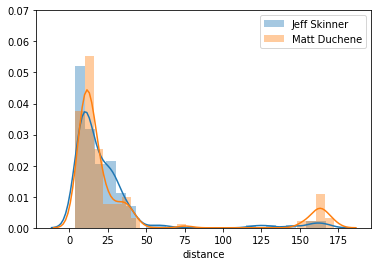

In [54]:
import matplotlib.pyplot as plt


for i in range(30):
    for j in range(30):
        player_id1  = int(top_goaliers.iloc[[i]]['player_id'])
        player_id2  = int(top_goaliers.iloc[[j]]['player_id'])
        if i!=j:
            plt.clf()
            ax = sns.distplot(Goals[Goals['player_id'] == player_id1]['distance'].dropna(), label=str(top_goaliers[top_goaliers['player_id'] == player_id1].iloc[0]['fullName']))
            sns.distplot(Goals[Goals['player_id'] == player_id2]['distance'].dropna(), label=str(top_goaliers[top_goaliers['player_id'] == player_id2].iloc[0]['fullName']))
            ax.set_ylim(0,0.07)
            ax.legend()
            fig = ax.get_figure()
            fig.savefig("data/Bars/HeadtoHead/" + str(player_id1)+ str(player_id2) + ".png", dpi = 500) 

In [55]:
Player_stat_detailed = Player_stat_detailed[Player_stat_detailed['player_id'].isin(arr)]

In [68]:
Player_stat_detailed

,player_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,faceOffWins,...,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,season,count
0,8471958,1925,0,0,0,3,0,0,0,0,...,0,0,0,5,0,1406,342,177,20122013,1
1,8471339,1597,1,0,2,3,0,0,0,0,...,3,0,0,2,1,1099,315,183,20122013,1
2,8471873,1695,0,0,1,2,0,0,0,0,...,0,0,0,2,0,1488,99,108,20122013,1
3,8473432,957,0,0,3,5,0,0,2,0,...,1,0,0,0,0,957,0,0,20122013,1
4,8470192,859,0,0,1,0,0,0,2,0,...,0,0,0,2,0,859,0,0,20122013,1
5,8474151,1919,0,1,3,5,0,0,0,0,...,1,0,0,3,0,1553,340,26,20122013,1
6,8475184,697,0,0,0,3,0,0,0,0,...,0,0,0,2,0,652,0,45,20122013,1
7,8475186,933,0,0,1,0,0,0,2,0,...,1,0,0,1,0,815,0,118,20122013,1
8,8474176,1183,1,0,4,3,0,0,0,0,...,1,0,0,0,1,1073,110,0,20122013,1
9,8467389,777,0,0,1,1,0,0,0,5,...,2,0,0,0,0,599,0,178,20122013,1
